<a href="https://colab.research.google.com/github/KaterynaSiniuta/ML-Hillel/blob/main/HW_5_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_wine


sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

**ДЗ 5. Linear Regression**

Для датасету

https://archive.ics.uci.edu/ml/datasets/wine+quality

побудувати модель лінійної регресії

Обов'язкові кроки:

первинний аналіз даних (відстуність пропусків, наявність категоріальних фіч, ...)
фича інжиніринг (побудувати  1-2 нові фічі)
масштабування фіч
поділ датасету на тренувальну, валідаційну та тестову частини
тренування базової моделі із дефолтними гіперпараметрами
підбір гіперпараметрів
оцінка результатів


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
red_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', delimiter=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Обидва дата сети (червоне та біле вино не мають категоріальних фіч та пропусків).Основний тип даних - флоат, таргет - якість, інт. Ми можемо поєднати два датасети. Додамо нову фічу type.

In [ ]:
# prompt: добавь тип фичу 0 красному вину и 1 белому

red_wine['type'] = 0
white_wine['type'] = 1


In [ ]:
# prompt: обьедени два датасета

wine = pd.concat([red_wine, white_wine])
wine.info()
wine.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<Axes: >

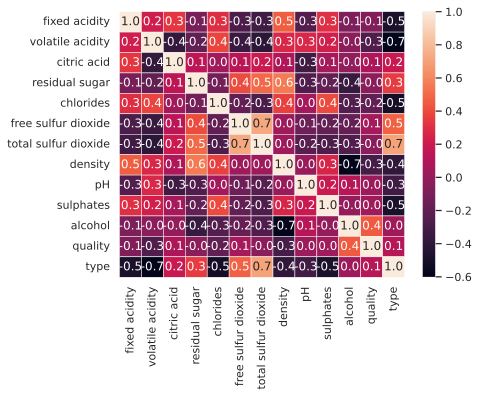

In [ ]:
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidth=.5, robust=True)

Побудували хітмап. до 0.8 нічого не дійшло, поки так і залишимо.

In [ ]:
# Calculate Acidity Index
wine['Acidity Index'] = (wine['fixed acidity'] + wine['volatile acidity'] + wine['citric acid']) / 3

# Calculate Sugar-Alcohol Balance
wine['Sugar-Alcohol Balance'] = wine['residual sugar'] / wine['alcohol']

# Display the updated DataFrame
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Acidity Index,Sugar-Alcohol Balance
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,2.700000,0.202128
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,2.893333,0.265306
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,2.866667,0.234694
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,4.013333,0.193878
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,2.700000,0.202128


Додали 2 фічі, подивимося на новий хітмап

*   Індекс кислотності вина
Об’єднує кілька показників кислотності для створення загального індексу.
Формула:

Acidity Index
=
(fixed acidity+volatile acidity+citric acid)/
3

Це дозволяє оцінити загальну кислотність вина одним числом.

Баланс цукру та алкоголю
Визначає співвідношення залишкового цукру до вмісту алкоголю:

Sugar-Alcohol Balance
=
residual sugar/
alcohol


Це може бути важливим для розуміння балансу смаку: солодкі вина з низьким алкоголем мають високий індекс, сухі — низький



<Axes: >

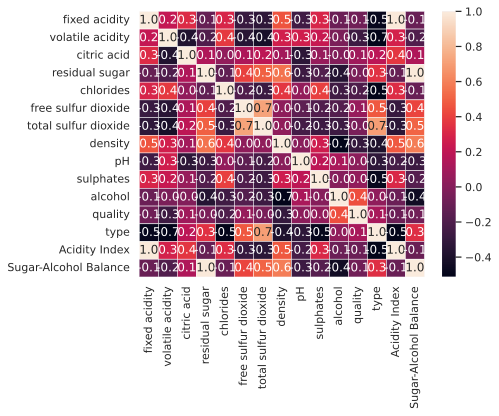

In [ ]:
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidth=.5, robust=True)

Нові фічі не мають занадто сильної кореляції

In [ ]:
# Подивимось, які фічі максимально корелюють з таргетом
corr_matrix["quality"].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.444319
type,0.119323
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
Sugar-Alcohol Balance,-0.074775


In [ ]:
# Розбиваємо датасет на X (усі колонки окрім таргету) та Y (таргет якість, який будемо шукати)
X = wine.drop(columns="quality")
y = wine["quality"]

In [ ]:
# Разбиваем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Масштабируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Линейная регрессия с L2-регуляризацией
sgd = SGDRegressor(penalty='l2', alpha=0.01, max_iter=1000)
sgd.fit(X_train, y_train)

# Предсказание и оценка
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

# Коефіцієнти
print("Коефіцієнти: \n", sgd.coef_)

# Оцінка точності моделі
print("Акуратність моделі:", sgd.score(X_test, y_test) * 100)


Среднеквадратичная ошибка (MSE): 0.55
Коефіцієнти: 
 [ 0.07437112 -0.23104272 -0.02289359  0.11925639 -0.02402784  0.10119907
 -0.11413361 -0.2047752   0.07796741  0.12200476  0.32443367 -0.12539803
  0.03986403  0.11930278]
Акуратність моделі: 25.571655382808146


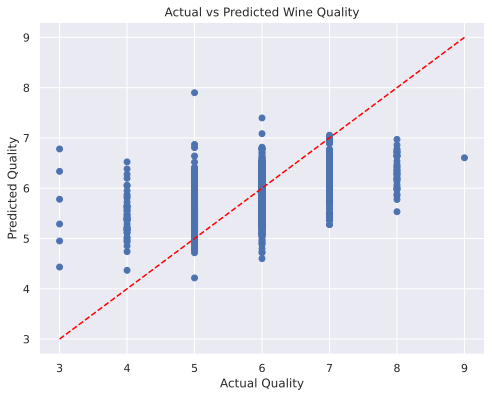

In [ ]:
# prompt: нарисуй график этой регрессии

import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are already defined from your previous code
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()


Така собі

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression

# Спочатку розділимо на train/valid/test
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

# Визначаємо GridSearchCV для підбору гіперпараметрів
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid={
        "fit_intercept": [True, False],  # Враховувати перехоплення чи ні
        "n_jobs": [1, 2, 4, 6, 8, 10],   # Скільки потоків використовувати
        "positive": [True, False],       # Обмежувати коефіцієнти лише позитивними значеннями
    },
    cv=5  # 5-кратна крос-валідація
)

# Навчаємо GridSearch на валідаційних даних
grid_search.fit(X_valid, y_valid)

# Виводимо найкращі параметри
print("Результати для LinearRegression:")
print("Найкращий score:", grid_search.best_score_)
print("Найкращі параметри:", grid_search.best_params_)

# Оцінюємо модель з найкращими параметрами на тестових даних
best_model = grid_search.best_estimator_.fit(X_train, y_train)
accuracy = best_model.score(X_test, y_test) * 100
print(f"Акуратність моделі з тюнінгованими гіперпараметрами: {accuracy:.2f}%")


Результати для LinearRegression:
Найкращий score: 0.2495534182958758
Найкращі параметри: {'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Акуратність моделі з тюнінгованими гіперпараметрами: 26.45%


Схоже, що ми вже використали найкращі параметри, i на наших даних тюнинг гіперпораметрів ситуацію не змінює

In [ ]:
# тепер спробуємо використати інший скейлер для масштабування фіч

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

reg_model = LinearRegression(n_jobs=1)
reg_model.fit(x_train, y_train)

predict = reg_model.predict(x_test)

# Коефіцієнти
print("Коефіцієнти: \n", reg_model.coef_)

# Подивимось на акуратність моделі на тестових даних
print("Акуратність моделі:", reg_model.score(x_test, y_test) * 100)

Коефіцієнти: 
 [ 0.74080779 -2.09922078  0.08724187  4.05383576 -0.58742117  1.50103645
 -0.6648301  -5.82961386  0.73438198  1.45469973  1.49086906 -0.33769393
  0.46146068  0.26104383]
Акуратність моделі: 29.813065845877063


в даному випадку інший скейлер трохи покращив результат моделі

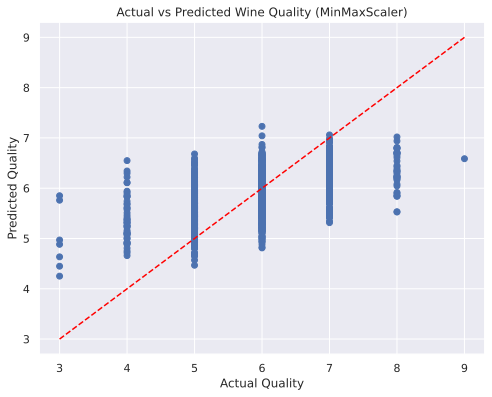

In [ ]:
# prompt: намалюй графік нової регресії

import matplotlib.pyplot as plt

# Assuming 'y_test' and 'predict' are already defined from your previous code
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predict)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (MinMaxScaler)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()


Спробуємо поліном

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Разбиваем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Добавляем полиномиальные признаки (например, 2-й степени)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Масштабируем признаки
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Полиномиальная регрессия с L2-регуляризацией
sgd = SGDRegressor(penalty='l2', alpha=0.01, max_iter=1000)
sgd.fit(X_train_poly, y_train)

# Предсказание и оценка
y_pred = sgd.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

Среднеквадратичная ошибка (MSE): 335.73


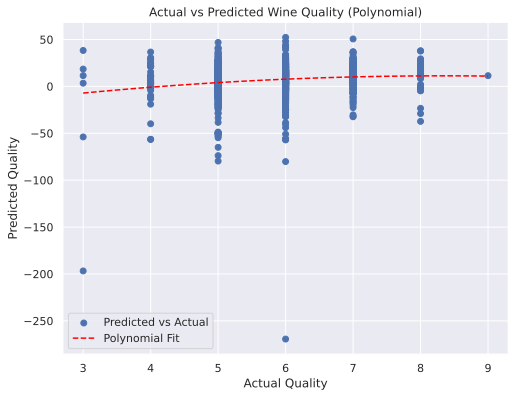

In [ ]:
# prompt: нарисуй график этого полинома

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_test_poly' and 'y_pred' are defined from the previous code.
# If not, you need to execute the entire code block before running this.

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label="Predicted vs Actual")


# Assuming you want to plot the polynomial itself (this part requires more context from your data)
# Example:  If X_test_poly represents a single feature after polynomial transformation
# and y_pred is the corresponding prediction.

# You would replace the code below with code that generates x_values and y_poly_values
# that represent the actual polynomial curve.

# Example: Generate x_values and corresponding y_values for a simple polynomial.
x_values = np.linspace(min(y_test), max(y_test), 100)  # Adjust range as needed
# Example polynomial (replace with your actual polynomial coefficients)
coefficients = np.polyfit(y_test, y_pred, 2)  # Fit a 2nd-degree polynomial
polynomial = np.poly1d(coefficients)
y_poly_values = polynomial(x_values)

# Plot the polynomial curve (Example)
plt.plot(x_values, y_poly_values, color='red', linestyle='--', label="Polynomial Fit")


plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (Polynomial)")
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()


Поліном виглядає цікавіше. Скоріш за все проблема з фічами у звичайній регресії